`Import Packages`

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pylab as pl

`Reading the data`

In [8]:
df = pd.read_csv("dataset/FuelConsumption.csv")

Some notes :
  - Try to have `theoretical defence` when choosing the independent variables.

  - Too many Xs might result in `overfitting`.

  - Xs `do not need to be continues`.

  - There needs to be a `linear relationship`.

In [9]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB',
          'FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY','CO2EMISSIONS']]
cdf.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,FUELCONSUMPTION_HWY,FUELCONSUMPTION_CITY,CO2EMISSIONS
0,2.0,4,8.5,6.7,9.9,196
1,2.4,4,9.6,7.7,11.2,221
2,1.5,4,5.9,5.8,6.0,136
3,3.5,6,11.1,9.1,12.7,255
4,3.5,6,10.6,8.7,12.1,244


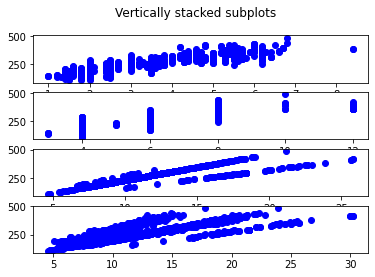

In [15]:
fig, axs = plt.subplots(4)
fig.suptitle('Vertically stacked subplots')
axs[0].scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS, color='blue')
axs[1].scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color='blue')
axs[2].scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS, color='blue')
axs[3].scatter(cdf.FUELCONSUMPTION_HWY,cdf.CO2EMISSIONS, color='blue')
axs[3].scatter(cdf.FUELCONSUMPTION_CITY,cdf.CO2EMISSIONS, color='blue')

`Make train and test data`

In [10]:
mask = np.random.rand(len(df)) < 0.8
train = cdf[mask]
test = cdf[~mask]

In [11]:
from sklearn import linear_model

In [17]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x,train_y)
print(f"Coef : {regr.coef_}")
print(f"Coef : {regr.intercept_}")

Coef : [[10.38556034  7.95516922  9.5798459 ]]
Coef : [64.92464125]


In [26]:
predicted_y = regr.predict(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB']])
y = np.asanyarray(test[['CO2EMISSIONS']])
print(f"R2-score = {regr.score(x,y)}")

R2-score = 0.8652329059866879


/home/yasin/.local/lib/python3.10/site-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(
